# Basics of Linear Regression
##### Author: Naveen Kaveti
##### Email: kaveti.naveenkumar@gmail.com

## Contents
1. Simple Linear Regression (SLR)
2. Multiple Linear Regression (MLR)
3. Assumptions

## 1. Simple Linear Regression

Regression is the process of building a relationship between a dependent variable and set of independent variables. Linear Regression restricts this relationship to be linear in terms of coefficients. In SLR, we consider only one independent variable.

### Example: The Waist Circumference – Adipose Tissue data

* Studies have shown that individuals with excess Adipose tissue (AT) in the abdominal region have a higher risk of cardio-vascular diseases

* Computed Tomography, commonly called the CT Scan is the only technique that allows for the precise and reliable measurement of the AT (at any site in the body)

* The problems with using the CT scan are:
    * Many physicians do not have access to this technology
    * Irradiation of the patient (suppresses the immune system)
    * Expensive
    
* Is there a simpler yet reasonably accurate way to predict the AT area? i.e.
    * Easily available
    * Risk free
    * Inexpensive
    
* A group of researchers  conducted a study with the aim of predicting abdominal AT area using simple anthropometric measurements i.e. measurements on the human body

* The Waist Circumference – Adipose Tissue data is a part of this study wherein the aim is to study how well waist circumference(WC) predicts the AT area

In [1]:
# Setting working directory
filepath <- c("/Users/nkaveti/Documents/Work_Material/Statistics Learning/")
setwd(filepath)

# Reading data
Waist_AT <- read.csv("adipose_tissue.csv")
cat("Number of rows: ", nrow(Waist_AT), "\n")
head(Waist_AT)

Number of rows:  109 


Waist,AT
74.75,25.72
72.60,25.89
81.80,42.60
83.95,42.80
74.65,29.84
71.85,21.68


Let's start with a scatter plot of **Waist** Vs **AT**, to understand the relationship between these two variables.

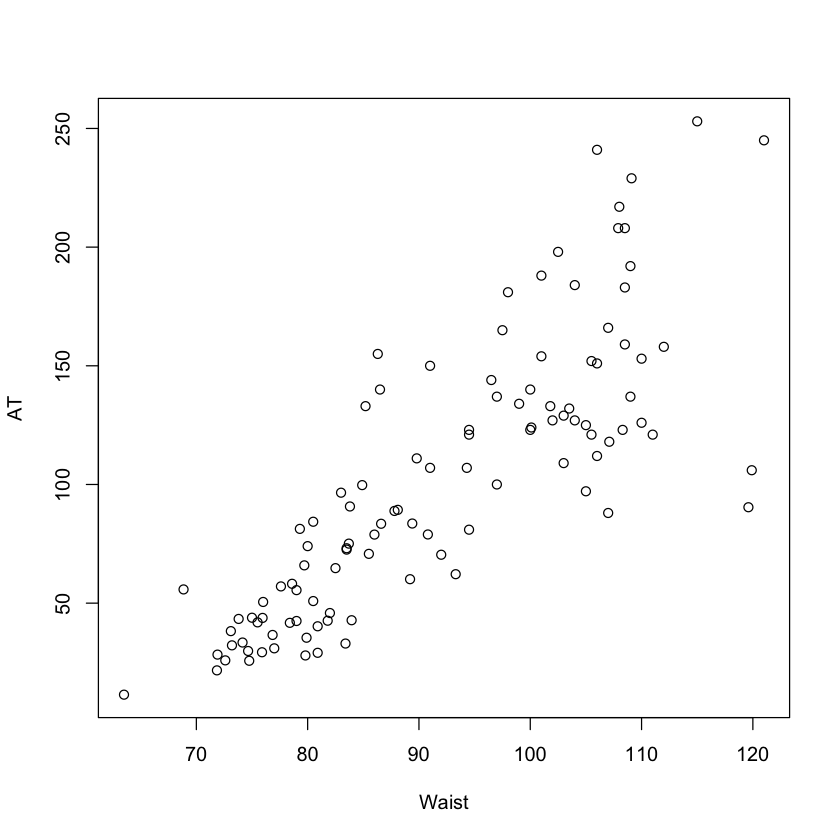

In [2]:
plot(AT ~ Waist, data = Waist_AT)

Any observations from above plot?

Now the objective is to find a linear relation between `Waist` and `AT`. In otherwords, finding the amount of change in `AT` per one unit change (increment/decrement) in `Waist`. 

In SLR, it is equivalent to finding an optimal straight line equation such that the sum of squares of differences between straight line and the points will be minimum. This method of estimation is called as [Ordiany Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares).


$$AT  = \beta_0 + \beta_1 \ Waist + \epsilon$$

$$Min_{\beta_0 , \beta_1} \ \ \epsilon^\intercal \epsilon \implies Min_{\beta_0 , \beta_1} \ \ (AT  - \beta_0 - \beta_1 \ Waist)^\intercal (AT  - \beta_0 - \beta_1 \ Waist)$$

Where, $\beta_1$ represents the amount of change in `AT` per one unit change in `Waist`.

Now our problem becomes an unconstrained optimization problem. We can find optimal values for $\beta_0$ and $\beta_1$ using basic calculus.

Lets re-write above regression equation in matrix form

$$ AT = X \beta + \epsilon$$

Where, $ X = [1 \ \ Waist]$ 1 is a vector of ones and $\beta = (\beta_0, \ \beta_1)$ 

$$
\begin{equation}
\begin{split}
\epsilon^\intercal \epsilon & = {(AT - X \beta)}^\intercal {(AT - X \beta)} \\
& = AT^\intercal AT - AT^\intercal X \beta - {(X \beta)}^\intercal AT + {(X \beta)}^\intercal (X \beta)
\end{split}
\end{equation}
$$

Now differentiate this w.r.t to $\beta$ and equate it to zero. Then we have,
$$\hat{\beta} = (X^\intercal X)^{-1} X^\intercal AT $$

Now we can find the fitted values of model by substituting $\hat{\beta}$ in above regression equation
$$\hat{AT} = X \hat{\beta}=X(X^\intercal X)^{-1} X^\intercal AT$$

**Note:** We are arriving to above equation through an assumption[$^1$](#Assumptions) of $E(\epsilon)=0$. What happens if this assumption violates?

Let, $X(X^\intercal X)^{-1} X^\intercal = H$
$$\hat{AT} = H \ AT$$

We call H as an hat matrix, because it transforms $AT$ into $\hat{AT}$ :D

In [6]:
# Lets compute the hat matrix
X = cbind(1, Waist_AT$Waist)
temp = solve(t(X) %*% X) %*% t(X)
betahat = temp %*% Waist_AT$AT # Estimated coefficients
cat("Let's compare the computed values with lm() output: \n \n")
cat("Computed Coefficients: \n \n")
print(data.frame(Intercept = betahat[1], Waist = betahat[2]))
cat("======================================================================= \n")
#cat("Optimal value for beta_0 is: ", betahat[1], "and for beta_1 is: ", betahat[2], "\n \n")
fit_lm = lm(AT ~ Waist, data = Waist_AT)
#cat("Compare our computed estimates with lm() estimates", "\n")
print(fit_lm)
cat("======================================================================= \n \n")
H = X %*% temp # Computing hat matrix
AThat = H %*% Waist_AT$AT # Computing predicted values
cat("Therefore, there is a", betahat[2], "increment in AT per one unit change in Waist \n" )

Let's compare the computed values with lm() output: 
 
Computed Coefficients: 
 
  Intercept    Waist
1 -215.9815 3.458859

Call:
lm(formula = AT ~ Waist, data = Waist_AT)

Coefficients:
(Intercept)        Waist  
   -215.981        3.459  

 
Therefore, there is a 3.458859 increment in AT per one unit change in Waist 


## What's next?

We succesfully computed estimates for regression coefficients and fitted values.

1. We are working on only one sample, how can we generalise these results to population? 

2. How to measure model's performance quantitatively?


**  We are working on only one sample, how can we generalise these results to population? **

Let's focus on question 1. Our regression coefficients are computed using only one sample and these values will change, if we change the sample. But how much they vary? We need to estimate the variation for each beta coefficient to check whether the corresponding regressor is consistently explaining the same behaviour even if we change the sample.

Now the big problem is collecting multiple samples to check the above hypothesis. Hence, we use distributions to check statistical significance of regressors.

For our example, we need to test below two hypotheses. 

$$ Null \ Hypothesis: \beta_{0} = 0 $$

$$ Alternative \ Hypothesis: \beta_{0} \neq 0$$


$$ Null \ Hypothesis: \beta_{1} = 0 $$

$$ Alternative \ Hypothesis: \beta_{1} \neq 0$$


Test Statistic for these hypotheses is, 

$$t = \frac{\hat{\beta_{i}}}{\sqrt{Var(\hat{\beta_{i}})}}$$

Test statistic `t` follows `t-distribution`, assuming[$^2$](#Assumptions) dependent variable follows `normal distribution`

**Suggestion:** If your not aware of [testing of hypothesis](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution) and [p-values](https://en.wikipedia.org/wiki/P-value) please browse through the Google.

Let's recall that,  $\hat{\beta} = (X^\intercal X)^{-1} X^\intercal AT$


$$\begin{equation}
\begin{split}
Var(\hat{\beta}) & = Var((X^\intercal X)^{-1} X^\intercal AT) \\
 & = (X^\intercal X)^{-1} X^\intercal \ Var(AT) \ X(X^\intercal X)^{-1} \\
 & = (X^\intercal X)^{-1} X^\intercal \ X(X^\intercal X)^{-1} \ \sigma^2 \\
 & = (X^\intercal X)^{-1} \sigma^2
\end{split}
\end{equation}
$$

**Note:** In the above calculations we assumed[$^3$](#Assumptions) $Var(AT) = \sigma^2$ (Constant). Where, $\sigma^2$ is variation in population AT.

**Suggestion:** Try solving $(X^\intercal X)^{-1}$ with $X = [1, \  x]$ where $x = (x_1, x_2, x_3 ... x_n)$. You will get the following expression.

$$
\
Var(\hat{\beta}) = 
\frac{1}{n \sum x_i^2 - (\sum x_i)^2}
\begin{bmatrix}
    \sum_{i=1}^n x_i^2 & -\sum x_i \\
    -\sum x_i & n
\end{bmatrix}
\sigma^2
\
$$

Diagonal elements of above matrix are varinaces of $\beta_0$ and $\beta_1$ respectively. Off-diagonal element is covariance between $\beta_0$ and $\beta_1$.

Hence, 

$$Var(\hat{\beta_0}) = \frac{\sigma^2 \sum_{i = 1}^n x_i^2}{n \sum_{i = 1}^n (x_i - \bar{x})^2}$$

$$Var(\hat{\beta_1}) = \frac{\sigma^2}{\sum_{i = 1}^n (x_i - \bar{x})^2}$$

One important observation from $Var(\hat{\beta})$ expressions is, $Var(x)$ is inversely proportional to $Var(\hat{\beta})$. That is, we will get more consistent estimators if there is high variation in corresponding predictors.

Recall that, $\sigma^2$ in above expression is the population variance, not the sample. Hence, we need to estimate this using the sample that we have.

$$\hat{\sigma^2} = \frac{1}{n-2} \sum_{i = 1}^n e_i^2$$

Where, $e_i = AT_i - \hat{AT}_i$

In [81]:
# Let's compute variances of beta hat and test statistic 't'
sigmasq = (1/length(AThat[-c(1:2)]))*sum((AThat - Waist_AT$AT)^2)
VarBeta0 = (sigmasq * sum(Waist_AT$Waist^2))/(length(AThat) * sum((Waist_AT$Waist - mean(Waist_AT$Waist))^2))
VarBeta1 = sigmasq/sum((Waist_AT$Waist - mean(Waist_AT$Waist))^2)
cat("Let's compare the computed values with lm() output: \n \n")
cat("======================================================================= \n")
cat("Computed Coefficients: \n \n")
res = data.frame(Estimate = betahat, Std.Error = c(sqrt(VarBeta0), sqrt(VarBeta1)), t_value = c(betahat[1]/sqrt(VarBeta0), betahat[2]/sqrt(VarBeta1)))
row.names(res) = c("(Intercept)", "Waist")
res$p_value = 2*pt(abs(res$t_value), nrow(Waist_AT)-1, lower.tail = FALSE)
print(res)
cat("=======================================================================")
summary(fit_lm)
cat("=======================================================================")

Let's compare the computed values with lm() output: 
 
Computed Coefficients: 
 
               Estimate  Std.Error   t_value      p_value
(Intercept) -215.981488 21.7962708 -9.909103 7.507198e-17
Waist          3.458859  0.2346521 14.740376 1.297124e-27


Call:
lm(formula = AT ~ Waist, data = Waist_AT)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.288  -19.143   -2.939   16.376   90.342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -215.9815    21.7963  -9.909   <2e-16 ***
Waist          3.4589     0.2347  14.740   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.06 on 107 degrees of freedom
Multiple R-squared:   0.67,	Adjusted R-squared:  0.667 
F-statistic: 217.3 on 1 and 107 DF,  p-value: < 2.2e-16


**Note:** Residual standard error = $\sqrt{sigmasq}$

**How to measure model's performance quantitatively?**

Let's focus on question 2 (How to measure model's performance quantitatively?). Recall that, our objective of building model is to explain the variation in `AT` using the variation in `Waist`. 

Total variation in AT is, $\sum_{i=1}^n (AT - mean(AT))^2$ this can be splitted into two parts as follows:

$$
\begin{equation}
\begin{split}
\sum_{i=1}^n (AT_i - \bar{AT})^2 & = \sum_{i=1}^n (AT  - \hat{AT_i} + \hat{AT_i} - \bar{AT})^2 \\
& = \sum_{i = 1}^n (\hat{AT_i} - \bar{AT})^2 + \sum_{i=1}^n (AT_i - \hat{AT_i})^2 
\end{split}
\end{equation}
$$

Where, $\sum_{i=1}^n (AT_i - \bar{AT})^2$ is the total variation in AT, $\sum_{i = 1}^n (\hat{AT_i} - \bar{AT})^2$ is the explained variation in AT, this is also called as **Regression Sum of Squares** and $\sum_{i=1}^n (AT_i - \hat{AT_i})^2$ is the unexplained variation in AT, this is also called as **Error Sum of Squares**

We can measure our model using the proportion of total variation explained by independent variable(s). That is, $\frac{Regression \  Sum \ of \ Squares}{Total \ Sum \ of \ Squares}$

The above measure is called as Multiple R-squared:

$$Multiple \ R-squared = \frac{\sum_{i = 1}^n (\hat{AT_i} - \bar{AT})^2}{\sum_{i=1}^n (AT_i - \bar{AT})^2}$$

**Interesting facts:** Multiple R-squared value in SLR is equals to $r^2$ and (1 - Multiple R-squared) is equals to the variance in residuals.

Where, r is [pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between dependent and independent variable.

In [143]:
# Let's compute Multiple R-squared measure for our example
SSR = sum((AThat - mean(Waist_AT$AT))^2)
SST = sum((Waist_AT$AT - mean(Waist_AT$AT))^2)
MulRSq = SSR/SST
cat("Compute Multiple R-squared: ", MulRSq, "\n \n")
cat("Note that computed R squared value is matching with lm() Multiple R-squared value in above output \n \n")
cat("======================================================================= \n \n")

Compute Multiple R-squared:  0.6700369 
 
Note that computed R squared value is matching with lm() Multiple R-squared value in above output 
 
 


**What happens to the Multiple R-squared value when you add an irrelevant variable to the model?**

In the below model, I am generating a random sample of uniform numbers between 1 to 100 and considering this as one of indepedent variable.

In [131]:
set.seed(1234)
fit_lm2 = lm(AT ~ Waist + runif(nrow(Waist_AT), 1, 100), data = Waist_AT)
summary(fit_lm2)
cat("======================================================================= \n \n")


Call:
lm(formula = AT ~ Waist + runif(nrow(Waist_AT), 1, 100), data = Waist_AT)

Residuals:
    Min      1Q  Median      3Q     Max 
-106.06  -17.53   -3.63   13.70   91.36 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -226.2894    23.4350  -9.656 3.33e-16 ***
Waist                            3.5060     0.2376  14.757  < 2e-16 ***
runif(nrow(Waist_AT), 1, 100)    0.1397     0.1181   1.183    0.239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33 on 106 degrees of freedom
Multiple R-squared:  0.6743,	Adjusted R-squared:  0.6682 
F-statistic: 109.7 on 2 and 106 DF,  p-value: < 2.2e-16


Multiple R-squared value increases irrespective of quality of explanation, which is incorrect. We should penalize our model performance if the quality of explanation is poor, that is why we need to adjust our R-squared value.

To penalize the explained part of AT, we inflate the unexplained part of AT with $\frac{Total \ degrees \ of \ freedom}{Error \ degrees \ of \ freedom}$. That is,

$$Adjusted \ R-squared = 1 - (1 - R^2) \frac{n-1}{n-p-1}$$

Where, n = Total number of observations; p = Total number of predictors (excluding intercept)

Adding a new independent variable will increase $\frac{n-1}{n-p-1}$ and $R^2$. If the amount of increment in $R^2$ is less than the amount of increment in $\frac{n-1}{n-p-1}$ than it will decrease the Adjusted R-squared value.

In `fit_lm2` model Adjusted R-squared decreases when we add randomly generated variable into the model. 

In [142]:
# Let's compute adjusted R-squared  for our example
TDF = nrow(Waist_AT[-1, ]) # Total degrees of freedom
EDF = nrow(Waist_AT[-1, ]) - 1 # Error degrees of freedom, where 1 is the number of predictors
AdjRSq = 1 - (1 - MulRSq) * (TDF/EDF) # Adjusted R square
cat("Compute Multiple R-squared: ", AdjRSq, "\n \n")
cat("Note that computed Adjusted R-squared value is matching with lm() Adjusted R-squared value in the above output \n \n")
cat("Note: We are comparing with fit_lm model, not fit_lm2 \n")
cat("======================================================================= \n")

Compute Multiple R-squared:  0.6669531 
 
Note that computed Adjusted R-squared value is matching with lm() Adjusted R-squared value in the above output 
 
Note: We are comparing with fit_lm model, not fit_lm2 


Aforementioned measures (Multiple R-squared & Adjusted R-squared) for **Goodness of fit** are functions of sample and these will vary as sample changes. Similar to `t-test` for regression coefficeints we need some statistical test to test model's performance for population.

Objective is to compare the Mean sum of squares due to regression and Mean sum of squares due to error. `F-test` is very helpful to compare the variations.

$$ F-test = \frac{\frac{1}{p-1}\sum_{i=1}^n (\hat{AT_i} - \bar{AT})^2}{\frac{1}{n-p-1} \sum_{i=1}^n (\hat{AT_i} - AT_i)^2}$$

**Note:** Above expression follows F distribution only if, AT follows Normal Distribution

In [145]:
RDF = TDF - EDF
SSE = SST - SSR
MSR = (1/RDF)*SSR
MSE = (1/EDF)*SSE
F_value = MSR/MSE
cat("Compute F statistic: ", F_value, "\n \n")
cat("Note that computed F-statistic is matching with lm() F-statistic value in the above output \n \n")
cat("Note: We are comparing with fit_lm model, not fit_lm2 \n")
cat("======================================================================= \n")

Compute F statistic:  217.2787 
 
Note that computed F-statistic is matching with lm() F-statistic value in the above output 
 
Note: We are comparing with fit_lm model, not fit_lm2 


## 2. Multiple Linear Regression (MLR)

In multiple linear regression we consider more than one predictor and one dependent variable. Most of the above explanation is valid for MLR too.

### Example: Car's MPG (Miles Per Gallon) prediction

Our interest is to model the MPG of a car based on the other variables.

Variable Description:

*	VOL = cubic feet of cab space 
*	HP = engine horsepower 
*	MPG = average miles per gallon 
*	SP = top speed, miles per hour 
*	WT = vehicle weight, hundreds of pounds

In [35]:
# Reading Boston housing prices data
car = read.csv("Cars.csv")
cat("Number of rows: ", nrow(car), "\n", "Number of variables: ", ncol(car), "\n")
head(car)

Number of rows:  81 
 Number of variables:  5 


HP,MPG,VOL,SP,WT
49,53.70068,89,104.1854,28.76206
55,50.01340,92,105.4613,30.46683
55,50.01340,92,105.4613,30.19360
70,45.69632,92,113.4613,30.63211
53,50.50423,92,104.4613,29.88915
70,45.69632,89,113.1854,29.59177


Our objective is to model the variation in `MPG` using other independent variables. That is,

$$MPG = \beta_0 + \beta_1 VOL + \beta_2 HP + \beta_3 SP + \beta_4 WT + \epsilon$$

Where, $\beta_1$ represents the amount of change in `MPG` per one unit change in `VOL` provided other variables are fixed. Let's consider below two cases,

**Case1:** HP = 49; VOL = 89; SP = 104.1854; WT = 28.76206 => MPG = 104.1854

**Case2:** HP = 49; VOL = 90; SP = 104.1854; WT = 28.76206 => MPG = 105.2453

then $\beta_1 = 105.2453 - 104.1854 = 1.0599$. Similarly, $\beta_2, \beta_3, \beta_4$

The above effect is called as [`Ceteris Paribus Effect`](https://en.wikipedia.org/wiki/Ceteris_paribus).

But in real world it is very difficult to collect records in above manner. That's why we compute (function of) partial correlation coefficients to quantify the effect of one variable, keeping others constant.

In [68]:
# Let's build MLR model to predict MPG based using other variables
fit_mlr_actual = lm(MPG ~ ., data = car)
summary(fit_mlr_actual)


Call:
lm(formula = MPG ~ ., data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94530 -0.32792 -0.04058  0.24256  1.71034 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.100e-17  5.461e-02   0.000   1.0000    
HP          -1.285e+00  2.453e-01  -5.239  1.4e-06 ***
VOL         -8.207e-01  1.389e+00  -0.591   0.5563    
SP           6.144e-01  2.458e-01   2.500   0.0146 *  
WT           3.287e-01  1.390e+00   0.237   0.8136    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4915 on 76 degrees of freedom
Multiple R-squared:  0.7705,	Adjusted R-squared:  0.7585 
F-statistic:  63.8 on 4 and 76 DF,  p-value: < 2.2e-16


One key observation from above output is, Std. Error for `VOL` and `WT` is very huge comparing to others and this inflates `t values` and `p value`. Hence, these two variables becomes very insignificant for the model.

Let's go into deep, what happened to $Var(\hat{\beta_{VOL}})$ and $Var(\hat{\beta_{WT}})$?

Analogy for $Var(\hat{\beta})$ in MLR is as follows:

$$Var(\hat{\beta_{VOL}}) = \frac{\sigma^2}{n\sum_{i=1}^n (VOL_i - \bar{VOL})^2 (1 - R_{VOL}^2)}$$

Where, $R_{VOL}^2$ = Multiple R-squared value obtained by regressing VOL on all other independent variables

**Task:** To understand it more clearly, take few random samples from cars data and run the MLR model and observe the variation in $\hat{\beta_{VOL}}$ and $\hat{\beta_{WT}}$.

In [70]:
# Let's regress VOL on all other independent variables'
fit_mlr = lm(VOL ~ HP + SP + WT, data = car)
summary(fit_mlr)


Call:
lm(formula = VOL ~ HP + SP + WT, data = car)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068938 -0.031641 -0.008794  0.032018  0.077931 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.155e-18  4.481e-03   0.000    1.000    
HP           2.331e-02  1.995e-02   1.168    0.246    
SP          -2.294e-02  2.000e-02  -1.147    0.255    
WT           9.998e-01  4.557e-03 219.396   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04033 on 77 degrees of freedom
Multiple R-squared:  0.9984,	Adjusted R-squared:  0.9984 
F-statistic: 1.637e+04 on 3 and 77 DF,  p-value: < 2.2e-16


It's surprising that, $R_{VOL}^2$ is 0.9984 and also only `WT` is significant. That is, these two predictors (`VOL` and `WT`) are highly correlated. This inflates $Var(\hat{\beta_{VOL}})$ and thus `t value`. We might be missing some of the important information because of high correlation between predictors. This problem is called as [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity).

One quick solution for this problem is to remove either `VOL` or `WT` from the model. Let's compute partial correlation coeficient between `MPG` and `VOL` by removing the effect of `WT` (say, $r_{MV.W}$) and partial correlation coeficient between `MPG` and `WT` by removing the effect of `VOL` (say, $r_{MW.V}$).

To compute $r_{MV.W}$ we need to compute the correlation between (a) part of `VOL` which cannot be explained by `WT` (regress `VOL` on `WT` and take the residuals) and (b) the part of `MPG` which cannot be explained by `WT` (regress `MPG` on `WT` and take the residuals)

In [73]:
fit_partial = lm(VOL ~ WT, data = car)
fit_partial2 = lm(MPG ~ WT, data = car)
res1 = fit_partial$residual
res2 = fit_partial2$residual
cat("Partial correlation coefficient between MPG and VOL by removing the effect of WT is: ", cor(res1, res2))

Partial correlation coefficient between MPG and VOL by removing the effect of WT is:  -0.08008873

In [75]:
fit_partial3 = lm(WT ~ VOL, data = car)
fit_partial4 = lm(MPG ~ VOL, data = car)
res1 = fit_partia3$residual
res2 = fit_partial4$residual
cat("Partial correlation coefficient between MPG and WT by removing the effect of VOL is: ", cor(res1, res2))

Partial correlation coefficient between MPG and WT by removing the effect of VOL is:  0.05538241

Since, $abs(r_{MV.W}) >= abs(r_{MW.V})$ we may remove `WT` from the model.

In [77]:
# Remove WT and rerun the model
fit_mlr_actual2 = lm(MPG ~ .-WT, data = car)
summary(fit_mlr_actual2)


Call:
lm(formula = MPG ~ . - WT, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94036 -0.31695 -0.03457  0.23316  1.71570 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.910e-17  5.427e-02   0.000   1.0000    
HP          -1.293e+00  2.415e-01  -5.353 8.64e-07 ***
VOL         -4.925e-01  5.516e-02  -8.928 1.65e-13 ***
SP           6.222e-01  2.421e-01   2.571   0.0121 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4884 on 77 degrees of freedom
Multiple R-squared:  0.7704,	Adjusted R-squared:  0.7614 
F-statistic: 86.11 on 3 and 77 DF,  p-value: < 2.2e-16


After eliminating `WT` from the model there is an increment of ~0.3% in Adjusted R-squared and more importantly, `VOL` becomes significant at 0 [los](https://en.wikipedia.org/wiki/Statistical_significance) (level of significance)

<a id='Assumptions'></a>
## 3. Assumptions

**Linear in Parameters:** We assume that there is a linear relation between dependent and set of independent variables

**Zero conditional mean:** $E(\epsilon \mid X) = 0$

**Homoskedasticity:** $Var(\epsilon \mid X) = \sigma^2$ (Constant)

**No perfect Collinearity:** All predecitors must be independent among themselves

**No serial correlation in errors:** Erros must be uncorrelated among themselves. In otherwords, observations or records must be independent of each other.


We discussed first 4 assumptions in section 1 and 2. 

<a target="_blank"  href="https://www.amazon.com/gp/product/1111531048/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1111531048&linkCode=as2&tag=nkaveti-20&linkId=83f6e694209869322f8bfad406883d2f"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=1111531048&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=nkaveti-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=nkaveti-20&l=am2&o=1&a=1111531048" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />